In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from keras import layers
%matplotlib inline

11490434/11490434 [==============================] - 0s 0us/step
60000
10000
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


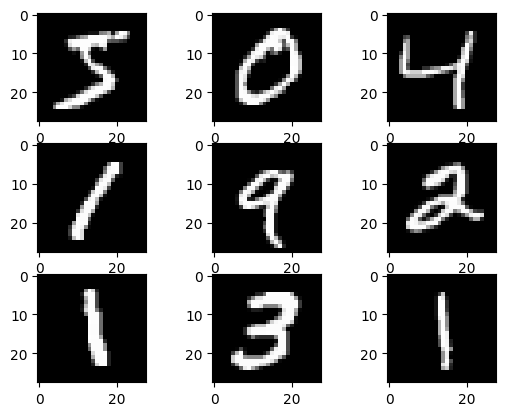

In [3]:
(trainX,trainY), (testX,testY) = mnist.load_data()
print(len(trainX))
print(len(testX))
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

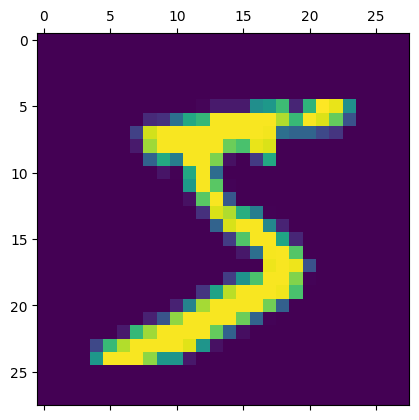

In [4]:
#print(trainX[0])
plt.matshow(trainX[0])

In [5]:
trainX = trainX /255
testX = testX / 255

In [6]:
x_train_flattened = trainX.reshape(len(trainX),28*28)
print(x_train_flattened)
print(x_train_flattened[0])
print(x_train_flattened.shape)
x_test_flattened = testX.reshape(len(testX),28*28)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.    

In [7]:
model = keras.Sequential(
    [
        # layers.Input(shape = (28*28,)), #input
        # layers.Dense(10,activation = 'softmax')
        layers.Dense(10,input_shape=(28*28,),activation = 'sigmoid' )
    ]
)

# model.compile(optimizer = 'sgd',
#               loss = 'categorical_crossentropy',
#               metrics = ['accuracy'])

model.compile(optimizer = 'adam',                 #sgd can be used
              loss = 'sparse_categorical_crossentropy',  # but categorical_crossentropy not work with following fit
              metrics = ['accuracy'])
#print summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x_train_flattened,trainY,epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4713 - accuracy: 0.8759
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9211
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2729 - accuracy: 0.9243
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9257
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2612 - accuracy: 0.9272
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9279
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2550 - accuracy: 0.9291
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2527 - accuracy: 0.9295
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

In [9]:
model.evaluate(x_test_flattened,testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.2754 - accuracy: 0.9238


[0.2753605544567108, 0.923799991607666]

313/313 [==============================] - 0s 1ms/step
[1.4960263e-03 1.7736087e-09 3.4985791e-03 9.7731632e-01 1.1032589e-03
 1.3605970e-01 3.0949607e-09 9.9992037e-01 8.3935760e-02 7.6224822e-01]
7


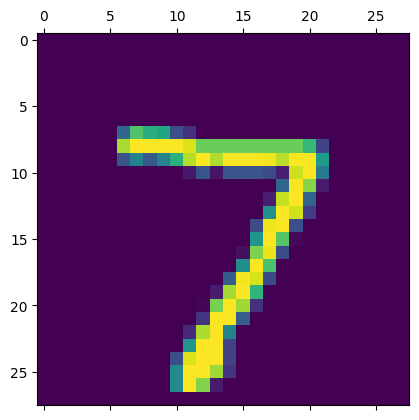

In [10]:
plt.matshow(testX[0])
ypredict = model.predict(x_test_flattened)
print(ypredict[0])
print(testY[0])

In [11]:
np.argmax(ypredict[0])

7

In [12]:
y_predicted_labels = [np.argmax(i) for i in ypredict]
print(y_predicted_labels[:5])

[7, 2, 1, 0, 4]


In [13]:
print(testY[:5])

[7 2 1 0 4]


In [14]:
cm = tf.math.confusion_matrix(labels= testY, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

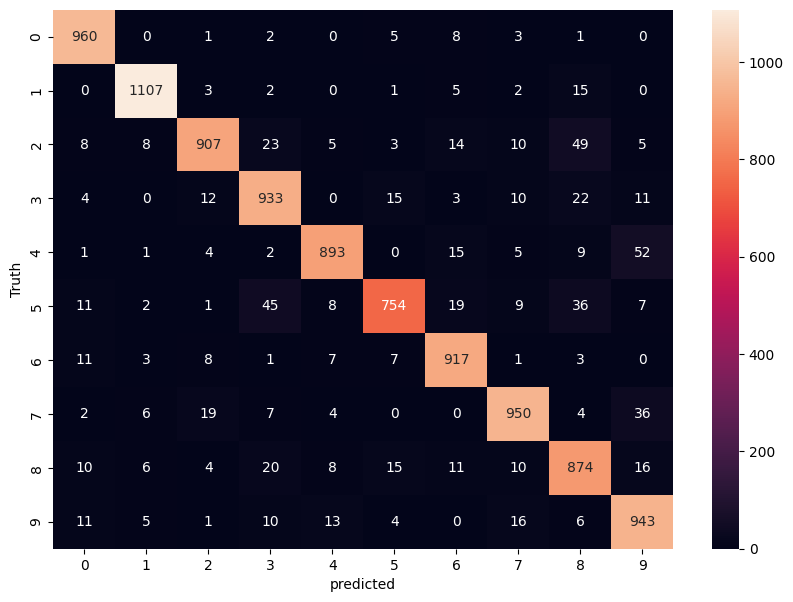

In [15]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt= 'd' )
plt.xlabel('predicted')
plt.ylabel('Truth')

In [16]:
model = keras.Sequential(
    [
        layers.Dense(100,input_shape=(28*28,),activation = 'relu' ), #without flatten use layers.Flatten(input_shape = (32,32,3)),
        layers.Dense(10,activation = 'sigmoid' )
    ]
)

model.compile(optimizer = 'adam',                 #sgd can be used
              loss = 'sparse_categorical_crossentropy',  # but categorical_crossentropy not work with following fit
              metrics = ['accuracy'])
#print summary  
model.summary()
model.fit(x_train_flattened,trainY,epochs = 5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2677 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1228 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0852 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9803
Epoch 5/5
1875/1875 [=====================

In [17]:
model.evaluate(x_test_flattened,testY)

313/313 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.9746


[0.08414942026138306, 0.9746000170707703]

[7, 2, 1, 0, 4]


Text(95.72222222222221, 0.5, 'Truth')

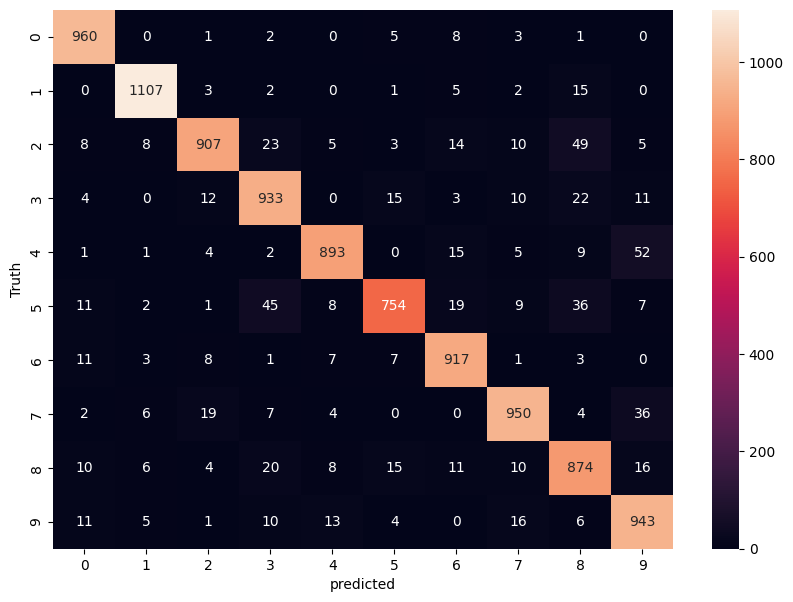

In [18]:
y_predicted_labels = [np.argmax(i) for i in ypredict]
print(y_predicted_labels[:5])
cm = tf.math.confusion_matrix(labels= testY, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt= 'd' )
plt.xlabel('predicted')
plt.ylabel('Truth')

In [29]:
cnn_model = keras.Sequential(
    [
        layers.Conv2D(filters=28, kernel_size = (3,3), activation = "relu", input_shape = (28,28,1)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=56, kernel_size = (3,3), activation = "relu"),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(100,activation = 'relu' ), 
        layers.Dense(10,activation = 'sigmoid' )
    ]
)

cnn_model.compile(optimizer = 'adam',                 #sgd can be used
              loss = 'sparse_categorical_crossentropy',  # but categorical_crossentropy not work with following fit
              metrics = ['accuracy'])
#print summary  
cnn_model.summary()
cnn_model.fit(trainX,trainY,epochs = 5)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 56)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1400)              0         
                                                                 
 dense_15 (Dense)            (None, 100)              

In [27]:
cnn_model.evaluate(trainX,trainY)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0101 - accuracy: 0.9967


[0.0101404944434762, 0.9966833591461182]